In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


from sklearn.metrics import roc_curve

from sklearn.metrics import auc

from sklearn.metrics import roc_auc_score


import random
from sklearn.model_selection import KFold



In [3]:
df = pd.read_csv('AER_credit_card_data.csv')

In [4]:
df.head()

card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5

In [10]:
df['targetvalue'] = (df['card']=='yes').astype(int)

In [11]:
df.head()

card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  targetvalue  
0           3      54           1      12            1  
1           3      34           1      13            1  
2           4      58           1       5            1  
3           0      25           1       7            1  
4           2      64           1       5            1

In [12]:
len(df)

1319

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_full_train), len(df_test), len(df_train) , len(df_val)

(1055, 264, 791, 264)

QN#1

ValueError: multi_class must be in ('ovo', 'ovr')

In [20]:
from sklearn.metrics import mutual_info_score

In [22]:
numericals = ['reports', 'dependents','active','share']

In [23]:
df_train[numericals].corrwith(df_train['targetvalue'])

reports      -0.448771
dependents   -0.056133
active        0.107173
share         0.406993
dtype: float64

In [27]:
df_train['reports'].values

array([ 3,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  3,  5,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  1,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  4,  2,
        0,  1,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  1,  1,  0,  0,  0,
        0,  3,  1,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  2,  0,  1,  6,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  1, 14,  5,  0,  0,  0, 12,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  1,  2,  3,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  7,  0,  0,  0

In [29]:


roc_auc_score(df_train['reports'].values, df_train['targetvalue'].values)

ValueError: multi_class must be in ('ovo', 'ovr')

Qn#2

In [ ]:
df = pd.read_csv('AER_credit_card_data.csv')

In [31]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [32]:



df.card = (df.card == 'yes').astype(int)

In [34]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [35]:
df.dtypes

card             int32
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [37]:
df.head()

card  reports       age  income     share  expenditure owner selfemp  \
0     1        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1     1        0  33.25000  2.4200  0.005217     9.854167    no      no   
2     1        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3     1        0  30.50000  2.5400  0.065214   137.869200    no      no   
4     1        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5

In [38]:
numerical = ['reports', 'age','income','share','expenditure','dependents','months','majorcards','active']
categorical = ['owner','selfemp']

In [39]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [40]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
card_decision = (y_pred >= 0.5)
(y_val == card_decision).mean()

0.9696969696969697

In [41]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [42]:
auc(fpr, tpr)

0.995171242063847

In [43]:
auc(fpr, tpr).round(3)

0.995

In [44]:
1.0/0.01

100.0

Qn#3

In [52]:
scores = []

pr = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    
    pr.append((t,p,r))
    
    scores.append((t, tp, fp, fn, tn))

In [46]:
scores

[(0.0, 211, 53, 0, 0),
 (0.01, 211, 34, 0, 19),
 (0.02, 211, 31, 0, 22),
 (0.03, 211, 24, 0, 29),
 (0.04, 211, 22, 0, 31),
 (0.05, 211, 22, 0, 31),
 (0.06, 211, 19, 0, 34),
 (0.07, 211, 19, 0, 34),
 (0.08, 210, 18, 1, 35),
 (0.09, 210, 18, 1, 35),
 (0.1, 210, 17, 1, 36),
 (0.11, 210, 17, 1, 36),
 (0.12, 210, 17, 1, 36),
 (0.13, 210, 11, 1, 42),
 (0.14, 208, 9, 3, 44),
 (0.15, 208, 9, 3, 44),
 (0.16, 208, 7, 3, 46),
 (0.17, 208, 7, 3, 46),
 (0.18, 207, 6, 4, 47),
 (0.19, 207, 5, 4, 48),
 (0.2, 207, 5, 4, 48),
 (0.21, 207, 5, 4, 48),
 (0.22, 207, 5, 4, 48),
 (0.23, 207, 5, 4, 48),
 (0.24, 206, 5, 5, 48),
 (0.25, 206, 5, 5, 48),
 (0.26, 206, 5, 5, 48),
 (0.27, 206, 5, 5, 48),
 (0.28, 206, 5, 5, 48),
 (0.29, 206, 5, 5, 48),
 (0.3, 205, 5, 6, 48),
 (0.31, 205, 4, 6, 49),
 (0.32, 205, 4, 6, 49),
 (0.33, 205, 4, 6, 49),
 (0.34, 205, 2, 6, 51),
 (0.35000000000000003, 205, 1, 6, 52),
 (0.36, 205, 1, 6, 52),
 (0.37, 205, 1, 6, 52),
 (0.38, 205, 1, 6, 52),
 (0.39, 205, 1, 6, 52),
 (0.4, 205, 1, 6

In [53]:
pr

[(0.0, 0.7992424242424242, 1.0),
 (0.01, 0.8612244897959184, 1.0),
 (0.02, 0.871900826446281, 1.0),
 (0.03, 0.8978723404255319, 1.0),
 (0.04, 0.9055793991416309, 1.0),
 (0.05, 0.9055793991416309, 1.0),
 (0.06, 0.9173913043478261, 1.0),
 (0.07, 0.9173913043478261, 1.0),
 (0.08, 0.9210526315789473, 0.995260663507109),
 (0.09, 0.9210526315789473, 0.995260663507109),
 (0.1, 0.9251101321585903, 0.995260663507109),
 (0.11, 0.9251101321585903, 0.995260663507109),
 (0.12, 0.9251101321585903, 0.995260663507109),
 (0.13, 0.9502262443438914, 0.995260663507109),
 (0.14, 0.9585253456221198, 0.985781990521327),
 (0.15, 0.9585253456221198, 0.985781990521327),
 (0.16, 0.9674418604651163, 0.985781990521327),
 (0.17, 0.9674418604651163, 0.985781990521327),
 (0.18, 0.971830985915493, 0.981042654028436),
 (0.19, 0.9764150943396226, 0.981042654028436),
 (0.2, 0.9764150943396226, 0.981042654028436),
 (0.21, 0.9764150943396226, 0.981042654028436),
 (0.22, 0.9764150943396226, 0.981042654028436),
 (0.23, 0.976

In [47]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [48]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [51]:
df_scores

threshold   tp  fp  fn  tn       tpr       fpr
0         0.00  211  53   0   0  1.000000  1.000000
1         0.01  211  34   0  19  1.000000  0.641509
2         0.02  211  31   0  22  1.000000  0.584906
3         0.03  211  24   0  29  1.000000  0.452830
4         0.04  211  22   0  31  1.000000  0.415094
..         ...  ...  ..  ..  ..       ...       ...
96        0.96  204   0   7  53  0.966825  0.000000
97        0.97  203   0   8  53  0.962085  0.000000
98        0.98  203   0   8  53  0.962085  0.000000
99        0.99  202   0   9  53  0.957346  0.000000
100       1.00  179   0  32  53  0.848341  0.000000

[101 rows x 7 columns]

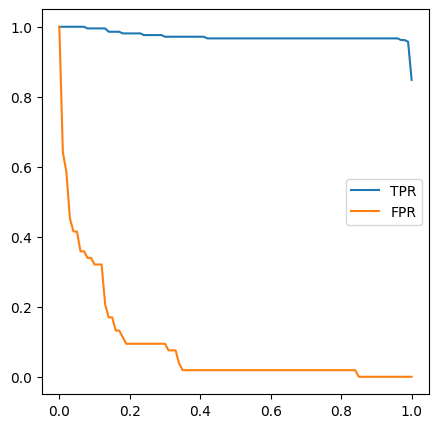

In [50]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [54]:
columns = ['threshold', 'p', 'r']
df_pr = pd.DataFrame(pr, columns=columns)

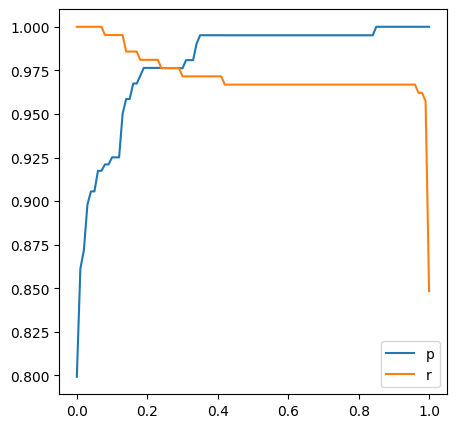

In [56]:
plt.figure(figsize=(5, 5))
plt.plot(df_pr.threshold, df_pr['p'], label='p')
plt.plot(df_pr.threshold, df_pr['r'], label='r')
plt.legend()

Qn#4

In [57]:
scores = []

pr = []

F1=[]

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    
    pr.append((t,p,r))
    
    f = 2*p*r/(p+r)
    
    F1.append((t,p,r,f))
    
    scores.append((t, tp, fp, fn, tn))

In [58]:
F1

[(0.0, 0.7992424242424242, 1.0, 0.8884210526315789),
 (0.01, 0.8612244897959184, 1.0, 0.9254385964912281),
 (0.02, 0.871900826446281, 1.0, 0.9315673289183224),
 (0.03, 0.8978723404255319, 1.0, 0.946188340807175),
 (0.04, 0.9055793991416309, 1.0, 0.9504504504504505),
 (0.05, 0.9055793991416309, 1.0, 0.9504504504504505),
 (0.06, 0.9173913043478261, 1.0, 0.9569160997732427),
 (0.07, 0.9173913043478261, 1.0, 0.9569160997732427),
 (0.08, 0.9210526315789473, 0.995260663507109, 0.9567198177676538),
 (0.09, 0.9210526315789473, 0.995260663507109, 0.9567198177676538),
 (0.1, 0.9251101321585903, 0.995260663507109, 0.958904109589041),
 (0.11, 0.9251101321585903, 0.995260663507109, 0.958904109589041),
 (0.12, 0.9251101321585903, 0.995260663507109, 0.958904109589041),
 (0.13, 0.9502262443438914, 0.995260663507109, 0.9722222222222221),
 (0.14, 0.9585253456221198, 0.985781990521327, 0.9719626168224299),
 (0.15, 0.9585253456221198, 0.985781990521327, 0.9719626168224299),
 (0.16, 0.9674418604651163, 0.9

In [60]:
columns = ['threshold', 'p', 'r','f1']
df_f1 = pd.DataFrame(F1, columns=columns)

In [62]:
plt.figure(figsize=(5, 5))
plt.plot(df_f1.threshold, df_pr['f1'], label='p')

plt.legend()

Qn#5

In [63]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [64]:
dv, model = train(df_train, y_train, C=0.001)

In [65]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [66]:
y_pred = predict(df_val, dv, model)

In [67]:
from sklearn.model_selection import KFold

In [68]:
from tqdm.auto import tqdm

C:\Users\ivtpr\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [69]:
n_splits = 5

In [70]:
 kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

In [74]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=1.0)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

In [75]:
scores

[0.9943244739756367,
 0.9944852941176471,
 0.9938076416337287,
 0.9997405293201868,
 1.0]

In [77]:
np.mean(scores), np.std(scores)

(0.9964715878094399, 0.0027852375431775406)

Qn#5

In [79]:
n_splits = 5

for C in tqdm([0.01,  0.1,  1,  10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 25%|█████████████████████                                                               | 1/4 [00:00<00:01,  2.75it/s]

C=0.01 0.995 +- 0.004


 50%|██████████████████████████████████████████                                          | 2/4 [00:00<00:00,  2.17it/s]

C=0.1 0.997 +- 0.003


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:01<00:00,  1.53it/s]

C=1 0.996 +- 0.003


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.25it/s]

C=10 0.997 +- 0.003
